In [1]:
import json
import pandas as pd

In [2]:

jsonl_file_path = "/content/train_manifest.jsonl" # path to your jsonl file

train_examples = []

with open(jsonl_file_path, "r") as file:
    for line in file:
        train_examples.append(json.loads(line))


In [4]:
train_df_dict = {"audio_path": [], "duration": [], "text": []}

In [5]:
for train_example in train_examples:
  train_df_dict['audio_path'].append(train_example['audio_filepath'])
  train_df_dict['duration'].append(train_example['duration'])
  train_df_dict['text'].append(train_example['text'])

train_df = pd.DataFrame(train_df_dict)

In [6]:
train_df.head()

,audio_path,duration,text
0,task2/super_cleaned_audios/lesson99.wav,338.0304,the next thing that we will see is how do you ...
1,task2/super_cleaned_audios/lesson66.wav,675.9441,i will do will do early stopping where again w...
2,task2/super_cleaned_audios/lesson72.wav,1548.9848,so in this module we will talk about better in...
3,task2/super_cleaned_audios/lesson73.wav,902.1759,now we will end with something known as batch ...
4,task2/super_cleaned_audios/lesson67.wav,431.6677,so next we look at on ensemble methods and thi...


In [7]:
train_df.to_csv("train_data.csv", index = False)

In [9]:
total_hours, total_utterances = 0, 0
total_utterances = len(train_df['duration'])
total_hours = sum(train_df['duration']) / 3600
print(f"total duration (in hours): {total_hours} \n total_utterances: {total_utterances}")

total duration (in hours): 27.276061416666664 
 total_utterances: 114


In [10]:
texts = train_df["text"].values.tolist()
set_of_words, set_of_chars = set(), set()

all_words = " ".join(texts).split()
all_chars = list(" ".join(texts))

for word in all_words:
  set_of_words.add(word)

for chars in all_chars:
  set_of_chars.add(chars)

print(f"total unique words: {len(set_of_words)} \n total unique characters: {len(set_of_chars)}")

total unique words: 6023 
 total unique characters: 50


In [11]:
global_variables_dict = {"total_utterances": total_utterances,
                         "total_hours": total_hours,
                         "vocabulary_size": len(set_of_words),
                         "character_size": len(set_of_chars),
                         "characters": set_of_chars}

print(global_variables_dict)
print(global_variables_dict['characters'])

{'total_utterances': 114, 'total_hours': 27.276061416666664, 'vocabulary_size': 6023, 'character_size': 50, 'characters': {'2', '\uf073', 'p', 'c', 'f', '\uf061', '3', '\uf02b', 'z', ',', 'w', 'y', 'b', '\uf0b4', 'n', '’', '\uf071', '0', 't', 'h', 's', '1', 'x', 'q', 'j', '7', '\uf0b6', 'o', 'd', 'm', '5', 'l', '“', 'u', '9', '4', '6', '-', 'a', 'v', '–', 'k', '‘', 'r', '8', 'g', 'i', 'ˆ', 'e', ' '}}
{'2', '\uf073', 'p', 'c', 'f', '\uf061', '3', '\uf02b', 'z', ',', 'w', 'y', 'b', '\uf0b4', 'n', '’', '\uf071', '0', 't', 'h', 's', '1', 'x', 'q', 'j', '7', '\uf0b6', 'o', 'd', 'm', '5', 'l', '“', 'u', '9', '4', '6', '-', 'a', 'v', '–', 'k', '‘', 'r', '8', 'g', 'i', 'ˆ', 'e', ' '}


In [12]:
#extension of dataframe for histograms

def word_count(text):
  word_set = set()
  for word in text.split():
    word_set.add(word)

  return len(word_set)

def char_count(text):
  char_set = set()
  for char in list(text):
    char_set.add(char)

  return len(char_set)

train_df['#words'] = train_df['text'].apply(word_count)
train_df['#characters'] = train_df['text'].apply(char_count)
train_df['duration'] = train_df['duration'].apply(lambda x: x/60)

In [14]:
train_df.head()

,audio_path,duration,text,#words,#characters
0,task2/super_cleaned_audios/lesson99.wav,5.633840,the next thing that we will see is how do you ...,276,30
1,task2/super_cleaned_audios/lesson66.wav,11.265735,i will do will do early stopping where again w...,428,27
2,task2/super_cleaned_audios/lesson72.wav,25.816413,so in this module we will talk about better in...,615,31
3,task2/super_cleaned_audios/lesson73.wav,15.036265,now we will end with something known as batch ...,504,32
4,task2/super_cleaned_audios/lesson67.wav,7.194462,so next we look at on ensemble methods and thi...,290,27


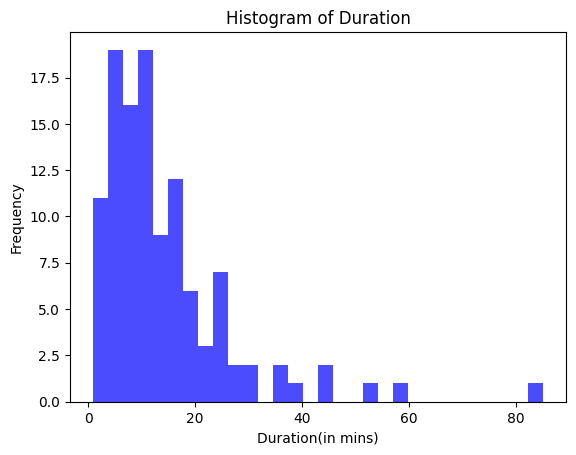

In [15]:
# Histograms for Duration

import matplotlib.pyplot as plt

plt.hist(train_df['duration'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Duration(in mins)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

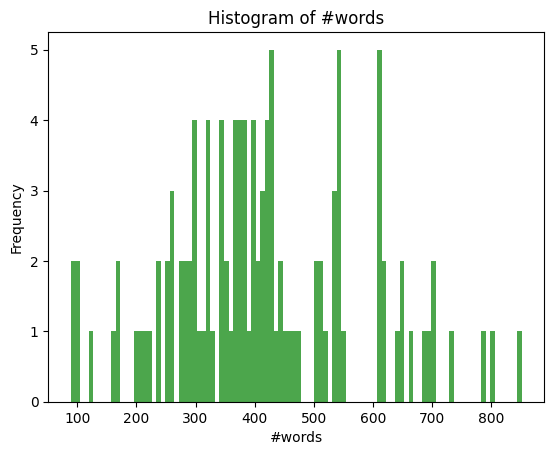

In [16]:
# Histograms for words

import matplotlib.pyplot as plt

plt.hist(train_df['#words'], bins=100, color='green', alpha=0.7)
plt.xlabel('#words')
plt.ylabel('Frequency')
plt.title('Histogram of #words')
plt.show()

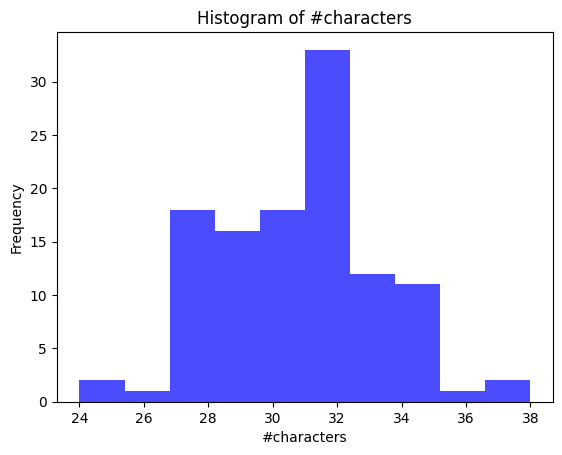

In [17]:
# Histograms for characters

import matplotlib.pyplot as plt

plt.hist(train_df['#characters'], bins=10, color='blue', alpha=0.7)
plt.xlabel('#characters')
plt.ylabel('Frequency')
plt.title('Histogram of #characters')
plt.show()